In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import hemcee

import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)

import time 
import numpy as np
import corner

In [4]:
# Distribution
dim = 3

cond_number = 1000
eigenvals = 0.1 * np.linspace(1, cond_number, dim)
H = np.random.randn(dim, dim)
Q, _ = np.linalg.qr(H)
precision = Q @ np.diag(eigenvals) @ Q.T
precision = 0.5 * (precision + precision.T)


true_mean = jnp.zeros(dim)
precision_matrix = jnp.array(precision)

def neg_log_prob(x):
    """Vectorized log density (potential energy)"""        
    # Vectorized operation for all samples
    centered = x - true_mean
    result = 0.5 * jnp.einsum('j,jk,k->', centered, precision_matrix, centered)
        
    return result


In [10]:
total_chains = 20

sampler = hemcee.HamiltonianEnsembleSampler(
    total_chains=total_chains,
    dim=dim,
    log_prob=neg_log_prob,
    step_size=0.1,
    L=10,
)

inital_states = jax.random.normal(jax.random.PRNGKey(0), shape=(total_chains, dim))

samples, diagnostics = sampler.run_mcmc(
    key=jax.random.PRNGKey(0),
    initial_state=inital_states,
    num_samples=10**5,
    warmup=10**5,
    adapt_step_size=True,
)
print(diagnostics)

Using 20 total chains: Group 1 (10), Group 2 (10)
{'acceptance_rate': Array(0.75, dtype=float64), 'dual_averaging_state': DAState(step_size=Array(1.15654989, dtype=float64), H_bar=Array(-1.14988501e-05, dtype=float64), log_epsilon_bar=Array(0.14544134, dtype=float64)), 'step_size': Array(1.15654989, dtype=float64)}


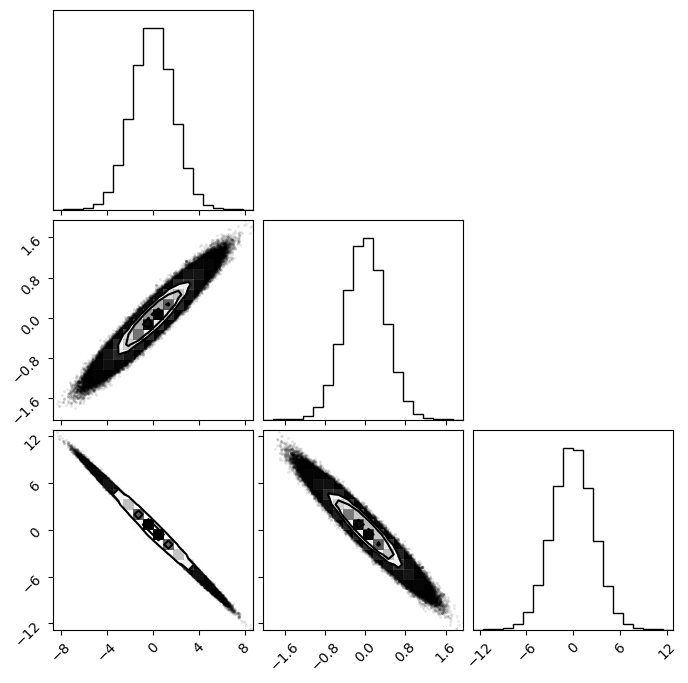

In [11]:
_ = corner.corner(np.array(samples.reshape(-1, dim)))

In [12]:
from hemcee.moves.hamiltonian.hmc_side import hmc_side_move

sampler = hemcee.HamiltonianEnsembleSampler(
    total_chains=total_chains,
    dim=dim,
    log_prob=neg_log_prob,
    step_size=0.1,
    L=10,
    move=hmc_side_move,
)

samples, diagnostics = sampler.run_mcmc(
    key=jax.random.PRNGKey(0),
    initial_state=inital_states,
    num_samples=10**5,
    warmup=10**5,
    adapt_step_size=True,
)


Using 20 total chains: Group 1 (10), Group 2 (10)


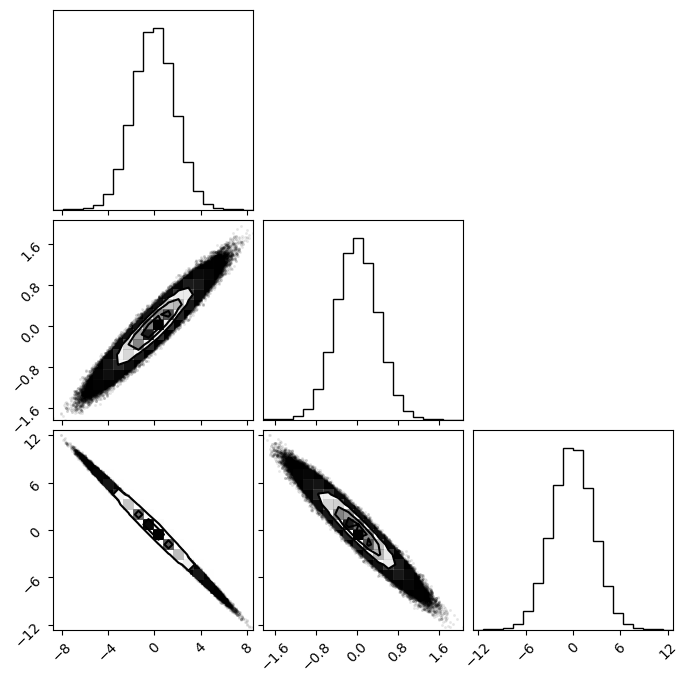

In [13]:
_ = corner.corner(np.array(samples.reshape(-1, dim)))

In [14]:
from hemcee.moves.vanilla.walk import walk_move

sampler = hemcee.EnsembleSampler(
    total_chains=total_chains,
    dim=dim,
    log_prob=neg_log_prob,
    move=walk_move,
)

samples, diagnostics = sampler.run_mcmc(
    key=jax.random.PRNGKey(0),
    initial_state=inital_states,
    num_samples=10**5,
    warmup=10**5,
)

Using 20 total chains: Group 1 (10), Group 2 (10)


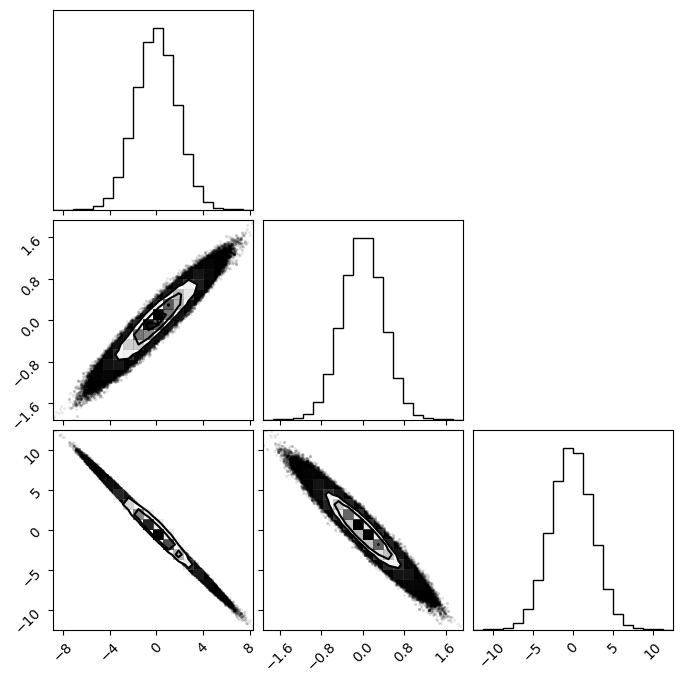

In [15]:
_ = corner.corner(np.array(samples.reshape(-1, dim)))

In [16]:
from hemcee.moves.vanilla.side import side_move

sampler = hemcee.EnsembleSampler(
    total_chains=total_chains,
    dim=dim,
    log_prob=neg_log_prob,
    move=side_move,
)

samples, diagnostics = sampler.run_mcmc(
    key=jax.random.PRNGKey(0),
    initial_state=inital_states,
    num_samples=10**5,
    warmup=10**5,
)

Using 20 total chains: Group 1 (10), Group 2 (10)


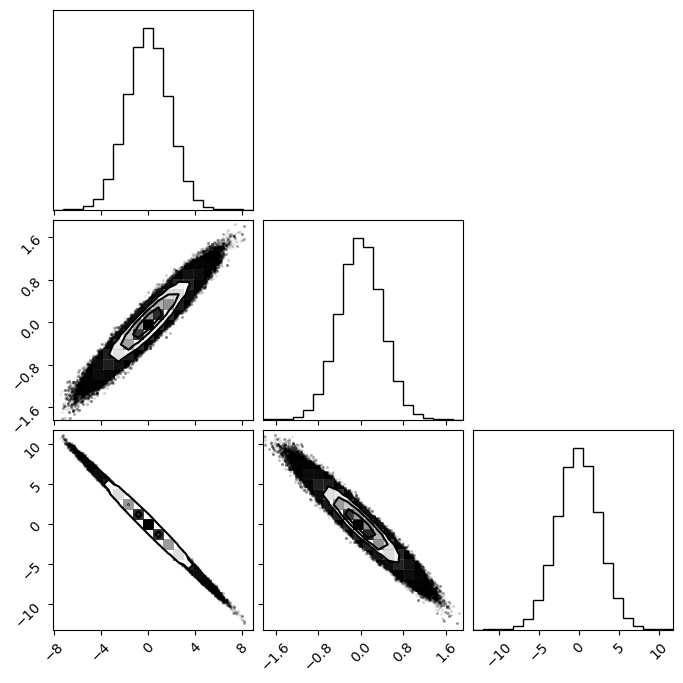

In [17]:
_ = corner.corner(np.array(samples.reshape(-1, dim)))

In [18]:
from hemcee.moves.vanilla.stretch import stretch_move

sampler = hemcee.EnsembleSampler(
    total_chains=total_chains,
    dim=dim,
    log_prob=neg_log_prob,
    move=stretch_move,
)

samples, diagnostics = sampler.run_mcmc(
    key=jax.random.PRNGKey(0),
    initial_state=inital_states,
    num_samples=10**5,
    warmup=10**5,
)

Using 20 total chains: Group 1 (10), Group 2 (10)


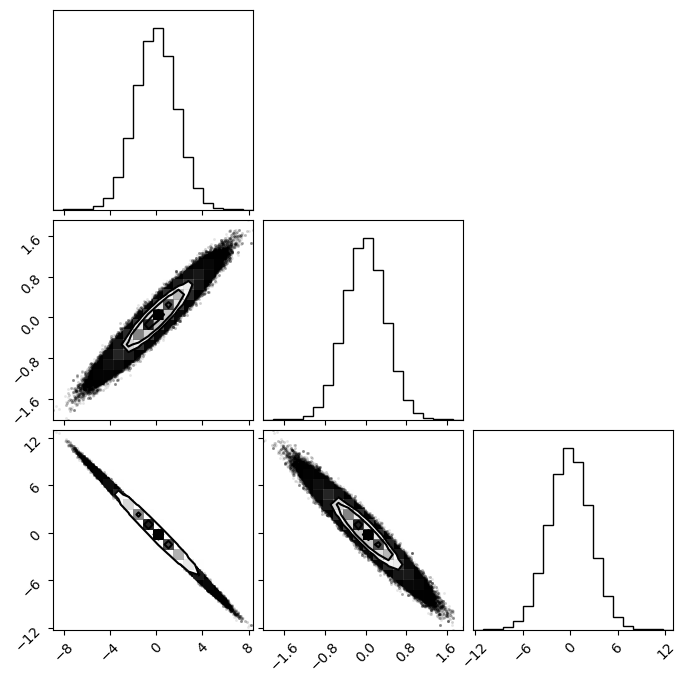

In [19]:
_ = corner.corner(np.array(samples.reshape(-1, dim)))